In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
ticker = "^SPX"
stock = yf.Ticker(ticker.upper())
history = stock.history(period='max')

In [3]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"24,307.00","24,307.00","24,307.00","24,307.00","24,307.00","24,307.00","24,307.00"
mean,625.50,649.04,641.28,645.40,"911,683,148.21",0.00,0.00
std,"1,065.54","1,060.34","1,048.45","1,054.78","1,621,908,456.37",0.00,0.00
min,0.00,4.40,4.40,4.40,0.00,0.00,0.00
25%,9.71,24.71,24.71,24.71,"1,530,000.00",0.00,0.00
50%,42.99,103.21,101.55,102.36,"20,470,000.00",0.00,0.00
75%,"1,037.87","1,046.07","1,029.28","1,038.10","1,004,500,000.00",0.00,0.00
max,"5,762.22","5,767.37","5,727.34","5,762.48","11,456,230,000.00",0.00,0.00


In [4]:
stock.info

{'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 5699.94,
 'open': 5737.48,
 'dayLow': 5702.83,
 'dayHigh': 5753.21,
 'regularMarketPreviousClose': 5699.94,
 'regularMarketOpen': 5737.48,
 'regularMarketDayLow': 5702.83,
 'regularMarketDayHigh': 5753.21,
 'volume': 2187793479,
 'regularMarketVolume': 2187793479,
 'averageVolume': 3801187812,
 'averageVolume10days': 4306155000,
 'averageDailyVolume10Day': 4306155000,
 'bid': 5700.99,
 'ask': 5783.09,
 'fiftyTwoWeekLow': 4103.78,
 'fiftyTwoWeekHigh': 5767.37,
 'fiftyDayAverage': 5546.895,
 'twoHundredDayAverage': 5249.0044,
 'currency': 'USD',
 'exchange': 'WCB',
 'quoteType': 'INDEX',
 'symbol': '^SPX',
 'underlyingSymbol': '^GSPC',
 'shortName': 'S&P 500 INDEX',
 'longName': 'S&P 500 INDEX',
 'firstTradeDateEpochUtc': -1325583000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': '598377dc-b757-301a-9621-bbef63eca4d0',
 'messageBoardId': 'finmb_INDEXSPX',
 'gmtOffSetMilliseconds': -14400000,
 'trailingP

In [5]:
stock.financials

""


In [6]:
stock.cash_flow

""


In [7]:
stock.balance_sheet

""


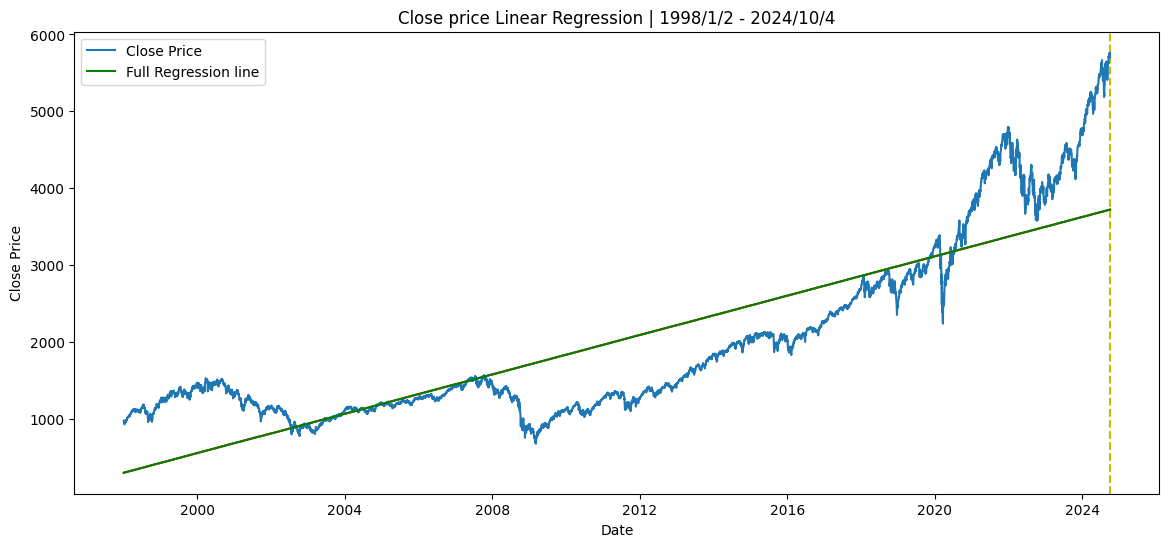

Coefficient (slope): 0.5085922676071823


In [11]:
a = plotting.plot_regression_line(history["1998":], reg_line_count=1, log_scale=False)

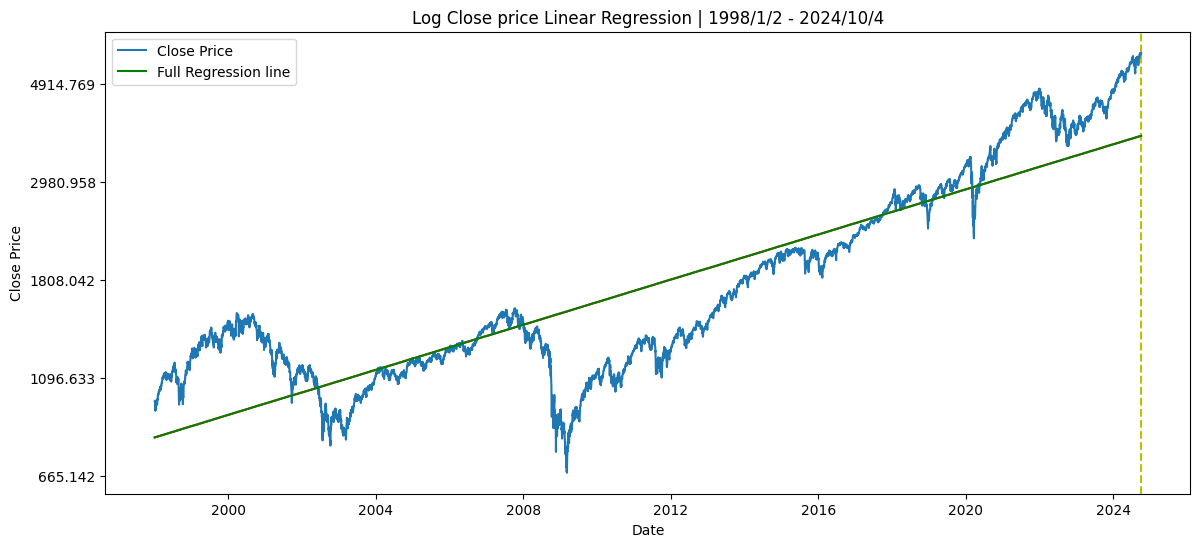

Coefficient (slope): 0.00022852115961031553


<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [13]:
plotting.plot_regression_line(history["1998":], reg_line_count=1, log_scale=True)

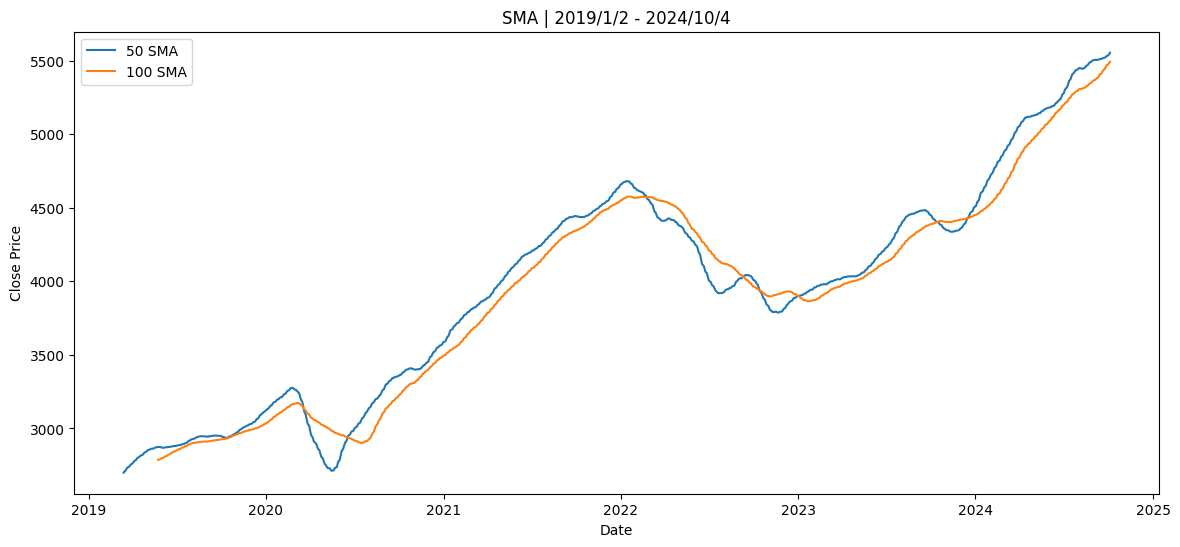

<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [14]:
plotting.plot_sma(history["2019":], [50, 100], hide_data=True)

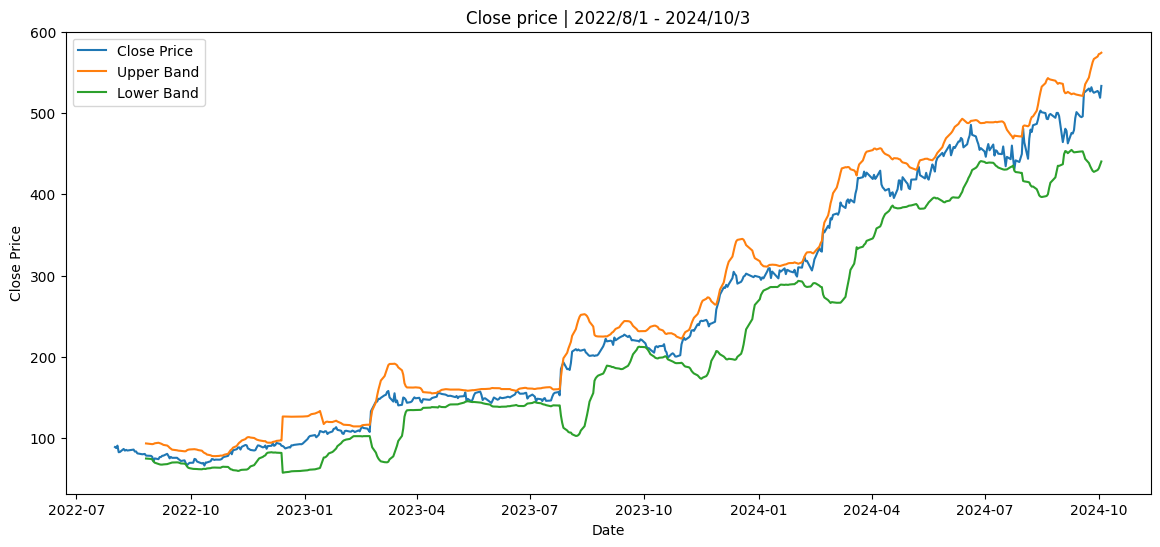

In [15]:
plotting.plot_bolinger_bands(history, 20, 3)

In [16]:
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands


# Load datas
df = history['2023-07-15':]


# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

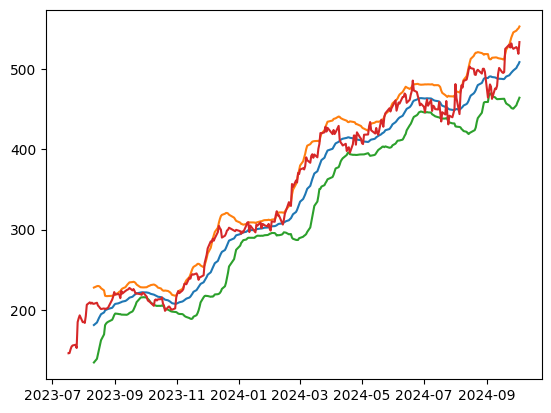

In [17]:
plt.plot(df['bb_bbm'])
plt.plot(df['bb_bbh'])
plt.plot(df['bb_bbl'])
plt.plot(df['Close'])